In [147]:
using Plots
using Polynomials
using CSV
using DataFrames
using SpecialPolynomials
using LinearAlgebra
using Statistics

In [22]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

In [23]:
function test(F)
    dot_base = Array{Float64, 2}(undef, length(F), length(F)); 

    for (i, f_i) in enumerate(F) 
        for (j, f_j) in enumerate(F)
            dot_base[i,j] = dot(f_i, f_j)
        end
    end
    return dot_base
end

test (generic function with 1 method)

In [142]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)
ekg_data.time *= 40
print(" ")

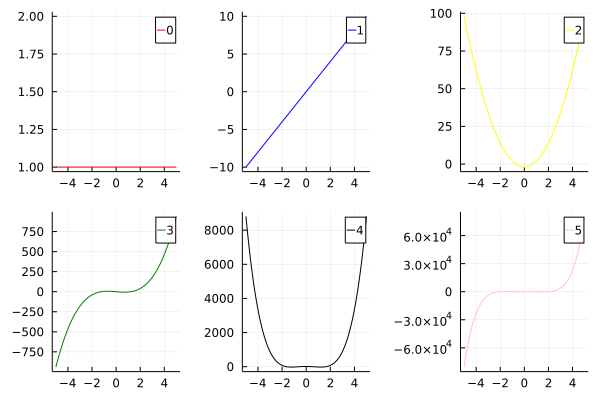

In [25]:
#zadanie 1
H = [basis(Hermite, i) for i in 0:5]

xs = -5:0.01:5
plot([x->el(x) for el in H], xs, labels = ["0" "1" "2" "3" "4" "5"], layout = 6, color = ["red" "blue" "yellow" "green" "black" "pink"])


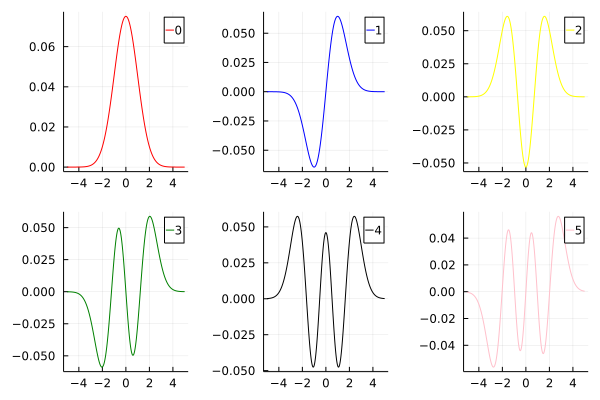

In [26]:
#zadanie 2
F = [base_fun(i, xs) for i in 0:5]

xs = -5:0.01:5
plot(xs, F, labels = ["0" "1" "2" "3" "4" "5"], layout = 6, color = ["red" "blue" "yellow" "green" "black" "pink"])

In [27]:
#zadanie 3
xs = -5:0.01:5
V = [normalize([H[i+1](x) for x in xs]) for i in 0:5]
dot_base = test(V)
#dużo "niezerowych" wartości - brak ortogonalności


6×6 Matrix{Float64}:
  1.0          -6.22447e-18   0.724494     …   0.569674     -8.41853e-18
 -6.22447e-18   1.0           2.26569e-17      1.61933e-18   0.785838
  0.724494      2.26569e-17   1.0              0.947992     -2.28238e-17
 -4.58183e-18   0.899824     -9.23471e-18     -9.19244e-18   0.967063
  0.569674      1.61933e-18   0.947992         1.0          -1.99506e-17
 -8.41853e-18   0.785838     -2.28238e-17  …  -1.99506e-17   1.0

In [28]:
#zadanie 3 cd
V = [base_fun(i, xs) for i in 0:5]
dot_base = test(V)
#wartosci blisko zera - ortogonalność
#jedynki na przekątnej - ortonormalność

6×6 Matrix{Float64}:
  1.0          -1.28479e-18  -5.27334e-11  …  -7.17021e-10  -6.47107e-19
 -1.28479e-18   1.0           5.31317e-18     -2.94442e-18  -1.53835e-8
 -5.27334e-11   5.31317e-18   1.0             -2.59736e-8   -2.97485e-19
  8.37625e-19  -1.52538e-9   -8.56829e-18      3.30805e-18  -3.09764e-7
 -7.17021e-10  -2.94442e-18  -2.59736e-8       1.0           1.72022e-18
 -6.47107e-19  -1.53835e-8   -2.97485e-19  …   1.72022e-18   1.0

5×3 DataFrame
 Row │ time        signalN    signalV    
     │ Float64     Float64    Float64    
─────┼───────────────────────────────────
   1 │ -0.1        0.0183886  -0.0990972
   2 │ -0.0972222  0.0145191  -0.0920442
   3 │ -0.0944444  0.012849   -0.0831644
   4 │ -0.0916667  0.0124946  -0.0722728
   5 │ -0.0888889  0.0124117  -0.0593656


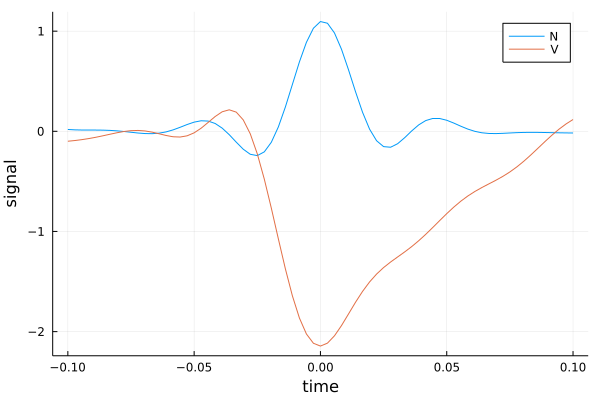

In [33]:
#zadanie 4
println(first(ekg_data, 5))
plot(ekg_data.time, ekg_data.signalN, xlabel = "time", ylabel = "signal", label = "N")
plot!(ekg_data.time, ekg_data.signalV, label = "V")

In [136]:
function approximate_n(xs, ys, n)
    ret = [0.0 for i in 1:length(xs)]
    for i in 0:n
        bf = base_fun(i, xs)
        dot_prod = dot(ys, bf)
        for i in 1:length(xs)
            ret[i] = ret[i] + dot_prod*bf[i]
        end
    end
    return ret
ends
end


aprox_until_degree (generic function with 1 method)

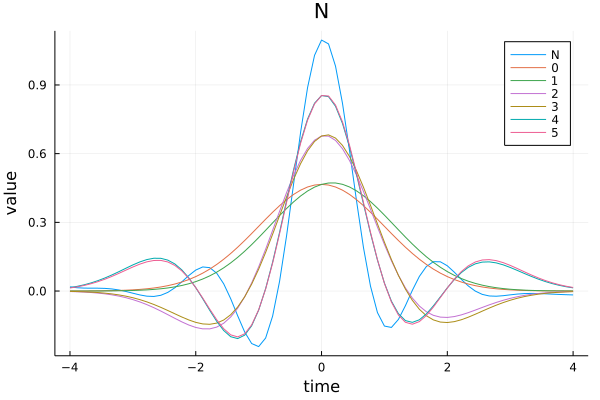

In [148]:
n = 5
approximationsN = [approximate_n(ekg_data.time, ekg_data.signalN, i) for i in 0:n]

plot(ekg_data.time, ekg_data.signalN, label = "N", xlabel = "time", ylabel = "value", title = "N")
plot!(ekg_data.time, approximationsN[1], label = "0")
plot!(ekg_data.time, approximationsN[2], label = "1")
plot!(ekg_data.time, approximationsN[3], label = "2")
plot!(ekg_data.time, approximationsN[4], label = "3")
plot!(ekg_data.time, approximationsN[5], label = "4")
plot!(ekg_data.time, approximationsN[6], label = "5")

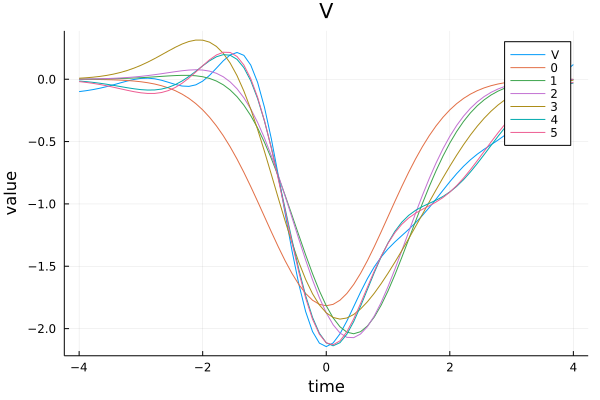

In [149]:
n = 5
approximationsV = [approximate_n(ekg_data.time, ekg_data.signalV, i) for i in 0:n]

plot(ekg_data.time, ekg_data.signalV, label = "V", xlabel = "time", ylabel = "value", title = "V")
plot!(ekg_data.time, approximationsV[1], label = "0")
plot!(ekg_data.time, approximationsV[2], label = "1")
plot!(ekg_data.time, approximationsV[3], label = "2")
plot!(ekg_data.time, approximationsV[4], label = "3")
plot!(ekg_data.time, approximationsV[5], label = "4")
plot!(ekg_data.time, approximationsV[6], label = "5")

0: 4.126750676450837
1: 4.074634352111369
2: 2.650551975147581
3: 2.6376185000421724
4: 1.3099207267849495
5: 1.307140425709323
6: 0.3867641476191436
7: 0.3796210424922586
8: 0.051397393851197556
9: 0.051430296404918315
10: 0.010664610571366778


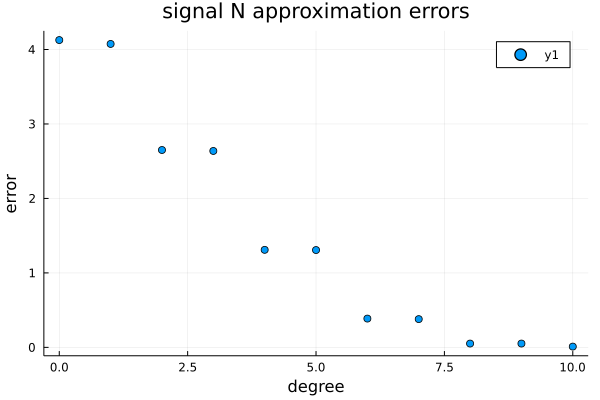

In [179]:
#zadanie 5
n = 10
approximationsN = [approximate_n(ekg_data.time, ekg_data.signalN, i) for i in 0:n]
errorN = [sum((approximationsN[i+1] .- ekg_data.signalN) .^ 2) for i in 0:n]

for i in 0:n
    print(string(i))
    print(": ")
    println(errorN[i+1])
end

scatter(0:n, errorN, title = "signal N approximation errors", xlabel = "degree", ylabel = "error")


0: 12.230276627203557
1: 4.5302919235068755
2: 4.4276593212622215
3: 2.926455963375489
4: 0.4659928571368384
5: 0.44393431265554556
6: 0.4274123903548459
7: 0.25340418024491657
8: 0.2370260201172629
9: 0.043014497629362755
10: 0.04128598233770142


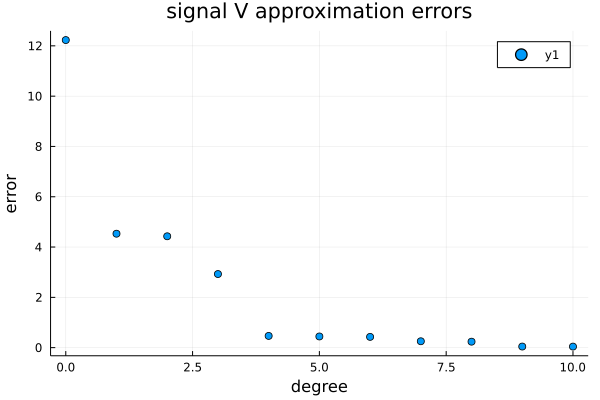

In [180]:
approximationsV = [approximate_n(ekg_data.time, ekg_data.signalV, i) for i in 0:n]
errorV = [sum((approximationsV[i+1] .- ekg_data.signalV) .^ 2) for i in 0:n]

for i in 0:n
    print(string(i))
    print(": ")
    println(errorV[i+1])
end

scatter(0:n, errorV, title = "signal V approximation errors", xlabel = "degree", ylabel = "error")